<a href="https://colab.research.google.com/github/JoshK68/forecasting_exchange_prices/blob/main/Forcasting_exchange_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasets/Independent_projects/Stock_forecasts/indexData (1).csv.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
from numpy import array
import numpy.polynomial.polynomial as poly
import pandas as pd
import datetime as dt
import seaborn
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, LSTM
from tensorflow.keras.optimizers import Adam

import numpy as np
from numpy import array
import numpy.polynomial.polynomial as poly
import pandas as pd
import datetime as dt
import seaborn
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
seaborn.set(rc={'figure.figsize':(16,8.27)})

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Independent_projects/Stock_forecasts/indexData (1).csv.zip')

In [6]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [7]:
df.info

<bound method DataFrame.info of        Index        Date         Open  ...        Close    Adj Close       Volume
0        NYA  1965-12-31   528.690002  ...   528.690002   528.690002          0.0
1        NYA  1966-01-03   527.210022  ...   527.210022   527.210022          0.0
2        NYA  1966-01-04   527.840027  ...   527.840027   527.840027          0.0
3        NYA  1966-01-05   531.119995  ...   531.119995   531.119995          0.0
4        NYA  1966-01-06   532.070007  ...   532.070007   532.070007          0.0
...      ...         ...          ...  ...          ...          ...          ...
112452  N100  2021-05-27  1241.119995  ...  1247.069946  1247.069946  379696400.0
112453  N100  2021-05-28  1249.469971  ...  1256.599976  1256.599976  160773400.0
112454  N100  2021-05-31  1256.079956  ...  1248.930054  1248.930054   91173700.0
112455  N100  2021-06-01  1254.609985  ...  1258.579956  1258.579956  155179900.0
112456  N100  2021-06-02  1258.489990  ...  1263.619995  1263.6199

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [9]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
###

In [12]:
df_NYA = df[df['Index'].isin(['NYA'])].sort_values('Date')

In [13]:
#### for above cell ####

In [14]:
df_NYA

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [15]:
###nya stock market == NYSE

In [16]:
###plt.plot(x, y)

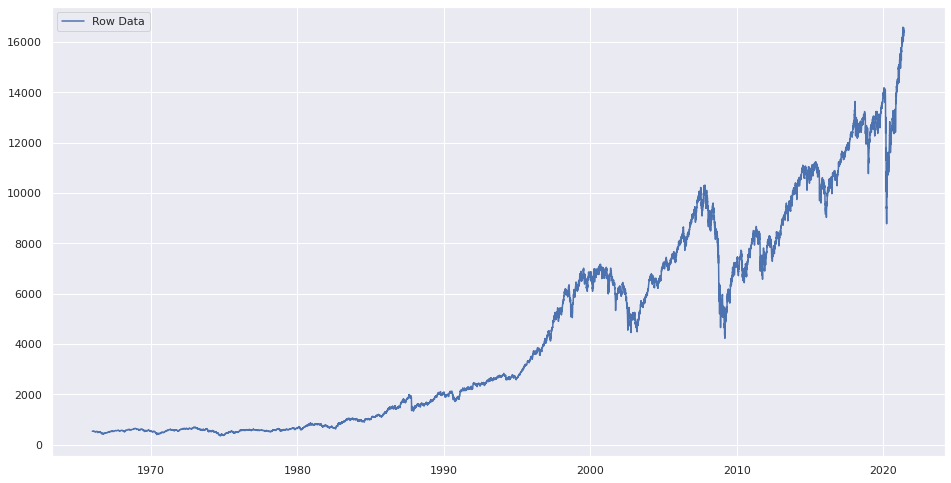

In [17]:
plt.plot(df_NYA['Date'], df_NYA['Close'], label='Row Data')
plt.legend();

In [18]:
df_NYA_data_close = df_NYA[['Date', 'Close']]

In [19]:
#you pass in a list including both the 'Date' and 'Close' columns

In [20]:
df_NYA_data_close

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
13943,2021-05-24,16464.689450
13944,2021-05-25,16390.189450
13945,2021-05-26,16451.960940
13946,2021-05-27,16531.949220


In [21]:
df_NYA_data_close.isnull().sum()

Date     0
Close    1
dtype: int64

In [22]:
df_NYA_data_close.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13938, 13939, 13940, 13941, 13942, 13943, 13944, 13945, 13946,
            13947],
           dtype='int64', length=13948)

In [23]:
np.where(df_NYA_data_close['Close'].isnull())[0]

array([289])

In [24]:
df_NYA_data_close.iloc[[289]]

,Date,Close
289,1967-02-23,NaN


In [25]:
###

In [26]:
df_NYA_data_close_withoutnan = df_NYA_data_close.dropna()

In [27]:
df_NYA_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

In [28]:
np.where(df_NYA_data_close_withoutnan['Close'].isnull())[0]

array([], dtype=int64)

In [29]:
data_train = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date < '2010-01-01' ]

data_test = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date >= '2010-01-01']

In [30]:
data_train

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
11072,2009-12-24,7255.000000
11073,2009-12-28,7261.240234
11074,2009-12-29,7252.189941
11075,2009-12-30,7241.240234


In [31]:
data_train.Date = data_train.Date.map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
X_train = data_train.Date[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [33]:
#### np.newaxis

In [34]:
X_train

array([[717701],
       [717704],
       [717705],
       ...,
       [733770],
       [733771],
       [733772]])

In [35]:
y_train = data_train.Close

In [36]:
y_train.isnull().sum()

0

In [37]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=50).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [38]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [39]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [40]:
model_rf

RandomForestRegressor()

In [41]:
X_all = df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [42]:
X_all

array([[717701],
       [717704],
       [717705],
       ...,
       [737936],
       [737937],
       [737938]])

In [43]:
np.where(df_NYA_data_close_withoutnan['Date'] == '1966-01-05')[0]

array([3])

In [44]:
X_all[3]

array([717706])

In [45]:
pred_tree = tree.predict(X_all)
pred_model_rf = model_rf.predict(X_all)
pred_lr = linear_reg.predict(X_all)
X = np.array(data_train.Date)
y = np.array(data_train.Close)
model_coef_polyfit = poly.polyfit(X, y, 3)

In [46]:
X_new = np.array(df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal))
ffit = poly.polyval(X_new, model_coef_polyfit)
X_new = pd.DataFrame(X_new, columns=['Date'])
X_new = X_new.Date.map(dt.datetime.fromordinal)

In [47]:
#https://www.kaggle.com/jvachier/prediction-stock-ml/notebook

In [48]:
#plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,label='Row Data')

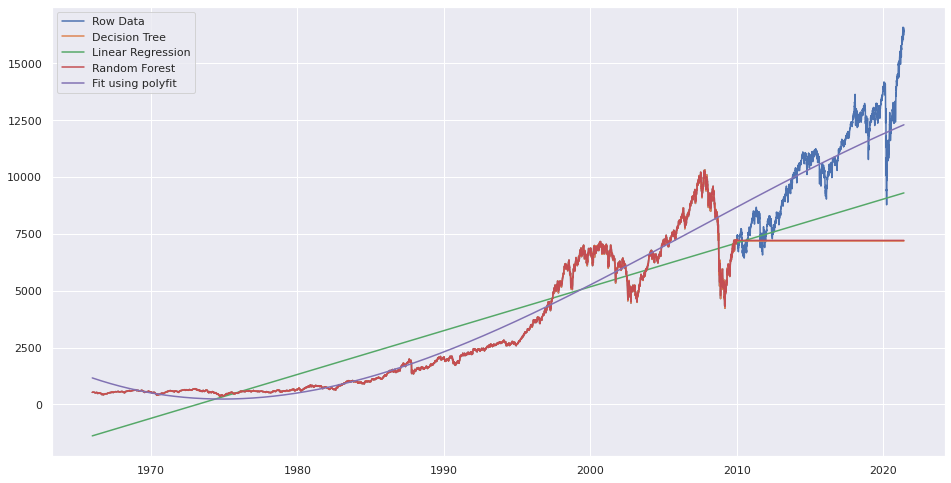

In [49]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,label='Row Data')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_tree,label='Decision Tree')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_lr,label='Linear Regression')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_model_rf,label='Random Forest')
plt.plot(X_new,ffit,label='Fit using polyfit')
plt.legend();

In [50]:
tree.score(X_all, df_NYA_data_close_withoutnan.Close)

0.7973522670100477

In [51]:
linear_reg.score(X_all, df_NYA_data_close_withoutnan.Close)

0.8281145573435111

In [52]:
model_rf.score(X_all, df_NYA_data_close_withoutnan.Close)

0.7996290243037054

In [53]:
#redo it for another index

df_N100 = df[df['Index'].isin(['N100'])].sort_values('Date')

In [54]:
new_index = np.arange(0, len(df_N100.Close), 1)

In [55]:
len(df_N100.Close)

5507

In [56]:
df_N100_data_close = df_N100[['Date', 'Close']]
df_N100_data_close.head()

,Date,Close
106950,1999-12-31,1000.000000
106951,2000-01-03,996.770020
106952,2000-01-04,955.969971
106953,2000-01-05,930.260010
106954,2000-01-06,922.460022


In [57]:
df_N100_data_close.index

Int64Index([106950, 106951, 106952, 106953, 106954, 106955, 106956, 106957,
            106958, 106959,
            ...
            112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454,
            112455, 112456],
           dtype='int64', length=5507)

In [58]:
df_N100_data_close.isnull().sum()

Date      0
Close    33
dtype: int64

In [59]:
df_N100_data_close_withoutnan = df_N100_data_close.dropna()

In [60]:
len(df_N100_data_close_withoutnan.Close)

5474

In [61]:
df_N100_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

In [62]:
df_N100_data_close_withoutnan.index

Int64Index([106950, 106951, 106952, 106953, 106954, 106955, 106956, 106957,
            106958, 106959,
            ...
            112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454,
            112455, 112456],
           dtype='int64', length=5474)

In [63]:
data_train_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date < '2015-01-01']
data_test_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date >= '2015-01-01']

In [64]:
####
data_train_N100.Date = data_train_N100.Date.map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
data_train_N100.Close

106950    1000.000000
106951     996.770020
106952     955.969971
106953     930.260010
106954     922.460022
             ...     
110811     846.840027
110812     843.859985
110813     846.969971
110814     834.340027
110815     839.520020
Name: Close, Length: 3834, dtype: float64

In [66]:
### np.newaxis

In [67]:
X_train_N100 = data_train_N100.Date[:, np.newaxis]
y_train_N100 = data_train_N100.Close

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [68]:
tree_N100 = DecisionTreeRegressor(criterion='mse', max_depth=50).fit(X_train_N100, y_train_N100)
linear_reg_N100 = LinearRegression().fit(X_train_N100, y_train_N100)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [69]:
tree_N100 = DecisionTreeRegressor(criterion='mse', max_depth=50).fit(X_train_N100, y_train_N100)
linear_reg_N100 = LinearRegression().fit(X_train_N100, y_train_N100)
model_rf_N100 = RandomForestRegressor(n_estimators=10).fit(X_train_N100, y_train_N100)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [70]:
X_all_N100 = df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [71]:
#https://www.kaggle.com/jvachier/prediction-stock-ml/notebook

In [72]:
pred_tree_N100 = tree_N100.predict(X_all_N100)
pred_lr_N100 = linear_reg_N100.predict(X_all_N100)
pred_model_rf_N100 = model_rf_N100.predict(X_all_N100)

In [73]:
pred_tree_N100 = tree_N100.predict(X_all_N100)
pred_lr_N100 = linear_reg_N100.predict(X_all_N100)
pred_model_rf_N100 = model_rf_N100.predict(X_all_N100)

In [74]:
X_N100 = np.array(data_train_N100.Date)
y_N100 = np.array(data_train_N100.Close)
model_coef_polyfit = poly.polyfit(X_N100, y_N100, 2)
X_new_N100 = np.array(df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal))
ffit_N100 = poly.polyval(X_new_N100, model_coef_polyfit)
X_new_N100 = pd.DataFrame(X_new_N100, columns=['Date'])
X_new_N100 = X_new_N100.Date.map(dt.datetime.fromordinal)

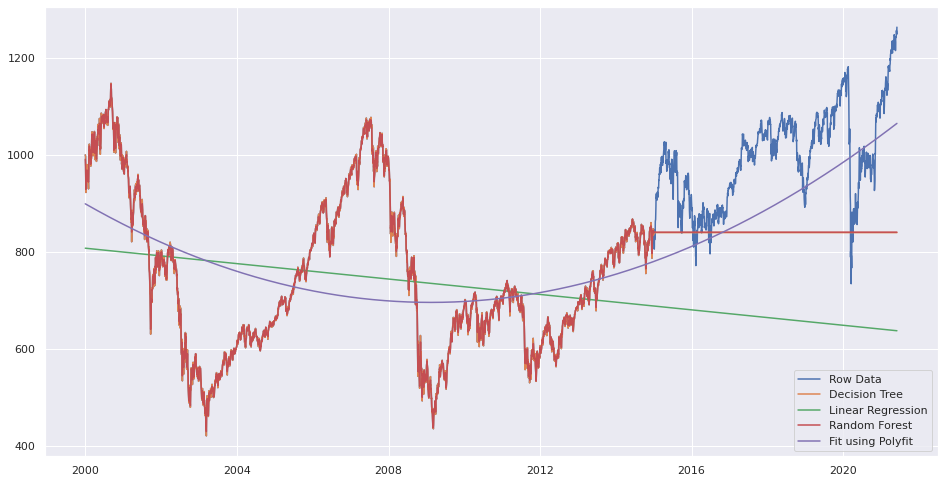

In [75]:
plt.plot(df_N100_data_close_withoutnan.Date, df_N100_data_close_withoutnan.Close, label='Row Data')
plt.plot(df_N100_data_close_withoutnan.Date, pred_tree_N100, label='Decision Tree')
plt.plot(df_N100_data_close_withoutnan.Date, pred_lr_N100, label='Linear Regression')
plt.plot(df_N100_data_close_withoutnan.Date, pred_model_rf_N100, label='Random Forest')
plt.plot(X_new_N100, ffit_N100, label='Fit using Polyfit')
plt.legend();

In [76]:
#In the following, I will prepare the time series, using input/output: {10/1,10/9,3/2}, for two indices NYA and N100. Moreover, I will build a RNN using LSTM.

In [77]:
# split data into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [78]:
data_train = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date < "2010-01-01"]
data_test = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date >= "2010-01-01"]
data_train

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
11072,2009-12-24,7255.000000
11073,2009-12-28,7261.240234
11074,2009-12-29,7252.189941
11075,2009-12-30,7241.240234


In [79]:
# choose a number of time steps

# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split data into samples
X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(11066, 10, 1)


In [80]:
#model

model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 10, 200)           320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [81]:
# fit model

history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
232/232 - 28s - loss: 485261.6250 - accuracy: 0.0000e+00 - val_loss: 38213.4883 - val_accuracy: 0.0000e+00 - 28s/epoch - 120ms/step
Epoch 2/10
232/232 - 23s - loss: 912.5364 - accuracy: 0.0000e+00 - val_loss: 133423.8125 - val_accuracy: 0.0000e+00 - 23s/epoch - 101ms/step
Epoch 3/10
232/232 - 23s - loss: 544.2427 - accuracy: 0.0000e+00 - val_loss: 28122.5195 - val_accuracy: 0.0000e+00 - 23s/epoch - 100ms/step
Epoch 4/10
232/232 - 23s - loss: 537.3071 - accuracy: 0.0000e+00 - val_loss: 121891.0391 - val_accuracy: 0.0000e+00 - 23s/epoch - 100ms/step
Epoch 5/10
232/232 - 23s - loss: 563.4000 - accuracy: 0.0000e+00 - val_loss: 34089.6055 - val_accuracy: 0.0000e+00 - 23s/epoch - 100ms/step
Epoch 6/10
232/232 - 23s - loss: 815.5438 - accuracy: 0.0000e+00 - val_loss: 41203.5430 - val_accuracy: 0.0000e+00 - 23s/epoch - 100ms/step
Epoch 7/10
232/232 - 23s - loss: 1405.6759 - accuracy: 0.0000e+00 - val_loss: 172318.1719 - val_accuracy: 0.0000e+00 - 23s/epoch - 100ms/step
Epoch 8/10
23

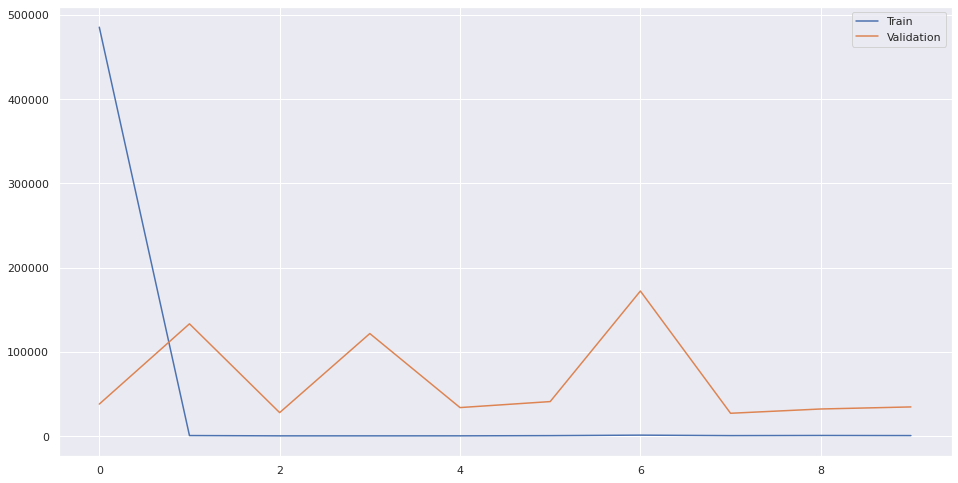

In [82]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend();

In [83]:
#demonstrate prediction
#choose a number of time steps

n_steps_in, n_steps_out = 10, 1
#split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_1 = model.predict(x_input, verbose=0)
print(yhat_1)

(2861, 10)
[[ 7380.1997]
 [ 7392.262 ]
 [ 7401.0884]
 ...
 [15777.161 ]
 [16060.718 ]
 [16154.481 ]]


In [84]:
test_mean_1 = np.mean(yhat_1, axis=1)
print(test_mean_1)

[ 7380.1997  7392.262   7401.0884 ... 15777.161  16060.718  16154.481 ]


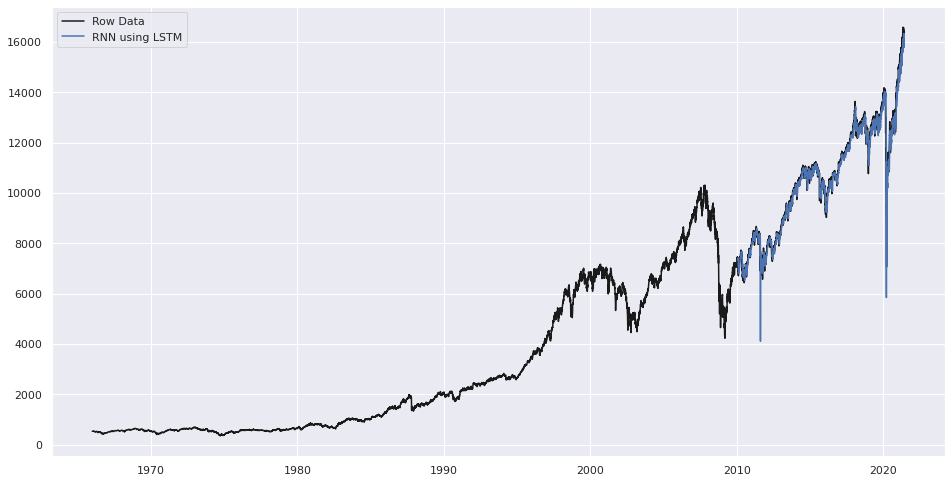

In [85]:
plt.plot(df_NYA_data_close_withoutnan.Date, df_NYA_data_close_withoutnan.Close, 'k', label='Row Data')
plt.plot(data_test.Date[10:], test_mean_1, label='RNN using LSTM')
plt.legend();

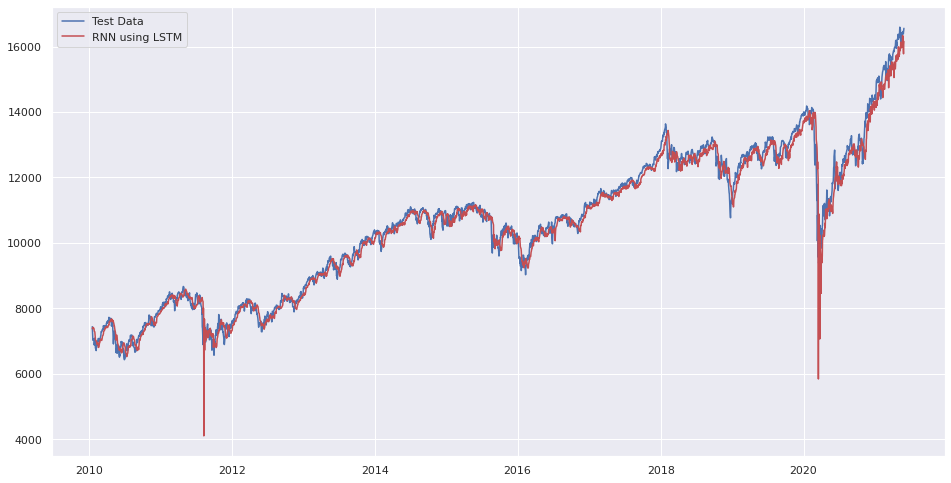

In [86]:
plt.plot(data_test.Date[10:],data_test.Close[10:],'-b',label='Test Data')
plt.plot(data_test.Date[10:],test_mean_1,'r',label='RNN using LSTM')
plt.legend();

In [87]:
r2_score(data_test.Close[10:], test_mean_1)

0.9808381940367366

In [88]:
mean_squared_error(data_test.Close[10:], test_mean_1)

93060.277467615

In [89]:
((test_mean_1-data_test.Close[10:])**2).sum()/len(test_mean_1)

93060.277467615

In [90]:
((test_mean_1-data_test.Close[10:])**2).mean()

93060.2774676149

In [91]:
# choose a number of time steps

n_steps_in, n_steps_out = 10, 9
# split into samples

X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)


(11058, 10, 1)


In [95]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 200)           161600    
                                                                 
 lstm_7 (LSTM)               (None, 10, 200)           320800    
                                                                 
 lstm_8 (LSTM)               (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 9)                 1809      
                                                                 
Total params: 805,009
Trainable params: 805,009
Non-trainable params: 0
_________________________________________________________________


In [96]:
history = model.fit(X, y, epochs=3, verbose=2, validation_split=0.33)

Epoch 1/3
232/232 - 27s - loss: 424799.5938 - accuracy: 0.0960 - val_loss: 96186.0234 - val_accuracy: 0.0940 - 27s/epoch - 116ms/step
Epoch 2/3
232/232 - 23s - loss: 1788.1317 - accuracy: 0.1052 - val_loss: 117506.2656 - val_accuracy: 0.1142 - 23s/epoch - 101ms/step
Epoch 3/3
232/232 - 24s - loss: 1521.8407 - accuracy: 0.1425 - val_loss: 86457.5000 - val_accuracy: 0.0814 - 24s/epoch - 102ms/step


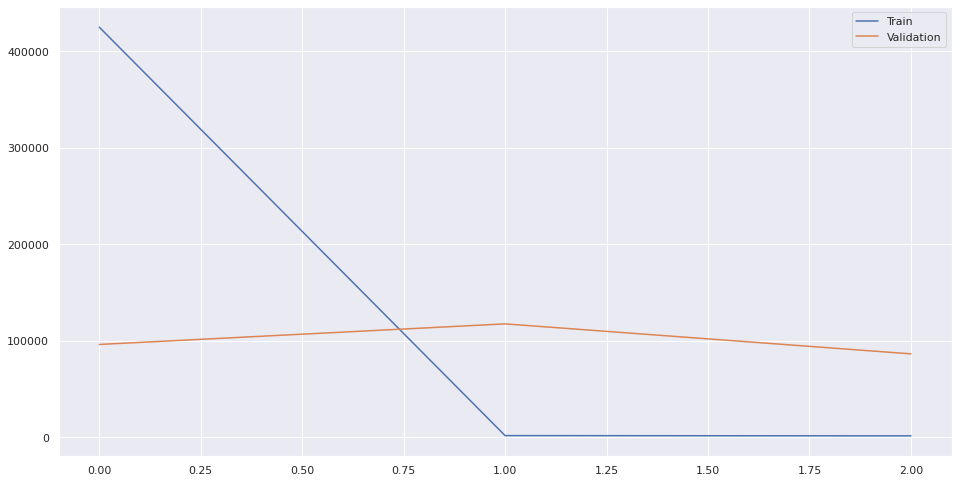

In [98]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend();

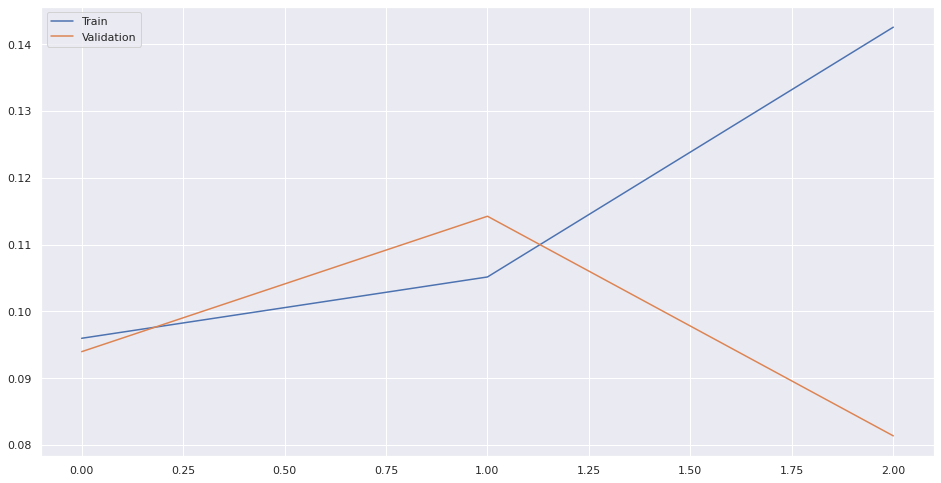

In [99]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend();

In [100]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 10, 9
# split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_2 = model.predict(x_input, verbose=0)
print(yhat_2)

(2853, 10)
[[ 7542.688   7601.3335  7376.0254 ...  7737.6123  7618.1475  7384.7173]
 [ 7546.5547  7541.784   7597.122  ...  7526.67    7514.0117  7498.1094]
 [ 7628.8945  7615.414   7681.0645 ...  7612.895   7572.8174  7514.7715]
 ...
 [16749.672  16485.234  16748.59   ... 16592.998  16541.65   16540.482 ]
 [16870.44   16668.244  17188.78   ... 16742.365  16586.037  17085.734 ]
 [16852.371  16747.54   17255.725  ... 16567.121  16602.31   17064.844 ]]


In [101]:
test_mean_2 = np.mean(yhat_2,axis=1)

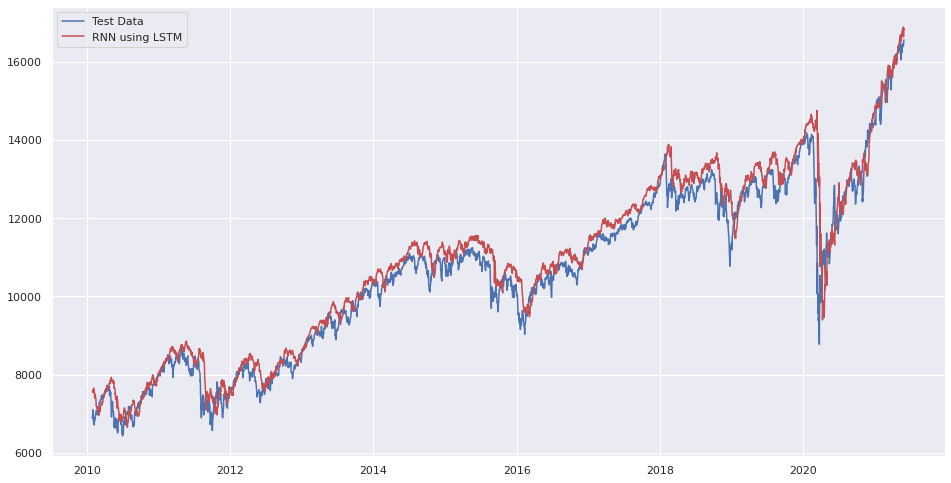

In [102]:
plt.plot(data_test.Date[18:],data_test.Close[18:],'-b',label='Test Data')
plt.plot(data_test.Date[18:],test_mean_2,'r',label='RNN using LSTM')
plt.legend();

In [103]:
r2_score(data_test.Close[18:], test_mean_2)

0.9503964835030426

In [104]:
mean_squared_error(data_test.Close[18:],test_mean_2)

239914.32580541723

In [105]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split data into samples
X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(11072, 3, 1)


In [106]:
# model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 3, 200)            161600    
                                                                 
 lstm_10 (LSTM)              (None, 3, 200)            320800    
                                                                 
 lstm_11 (LSTM)              (None, 200)               320800    
                                                                 
 dense_3 (Dense)             (None, 2)                 402       
                                                                 
Total params: 803,602
Trainable params: 803,602
Non-trainable params: 0
_________________________________________________________________


In [107]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
232/232 - 12s - loss: 535301.1875 - accuracy: 0.5081 - val_loss: 16036.2090 - val_accuracy: 0.5334 - 12s/epoch - 53ms/step
Epoch 2/10
232/232 - 8s - loss: 367.9123 - accuracy: 0.5077 - val_loss: 15665.7881 - val_accuracy: 0.4666 - 8s/epoch - 36ms/step
Epoch 3/10
232/232 - 8s - loss: 363.6121 - accuracy: 0.5018 - val_loss: 15900.9502 - val_accuracy: 0.5093 - 8s/epoch - 35ms/step
Epoch 4/10
232/232 - 8s - loss: 350.2207 - accuracy: 0.4996 - val_loss: 17144.1914 - val_accuracy: 0.5372 - 8s/epoch - 36ms/step
Epoch 5/10
232/232 - 8s - loss: 333.9661 - accuracy: 0.5106 - val_loss: 13084.3545 - val_accuracy: 0.5038 - 8s/epoch - 35ms/step
Epoch 6/10
232/232 - 8s - loss: 295.4836 - accuracy: 0.5032 - val_loss: 11116.0752 - val_accuracy: 0.5000 - 8s/epoch - 35ms/step
Epoch 7/10
232/232 - 8s - loss: 266.4355 - accuracy: 0.5005 - val_loss: 12213.8789 - val_accuracy: 0.5000 - 8s/epoch - 35ms/step
Epoch 8/10
232/232 - 8s - loss: 242.2539 - accuracy: 0.5013 - val_loss: 10810.3350 - val_acc

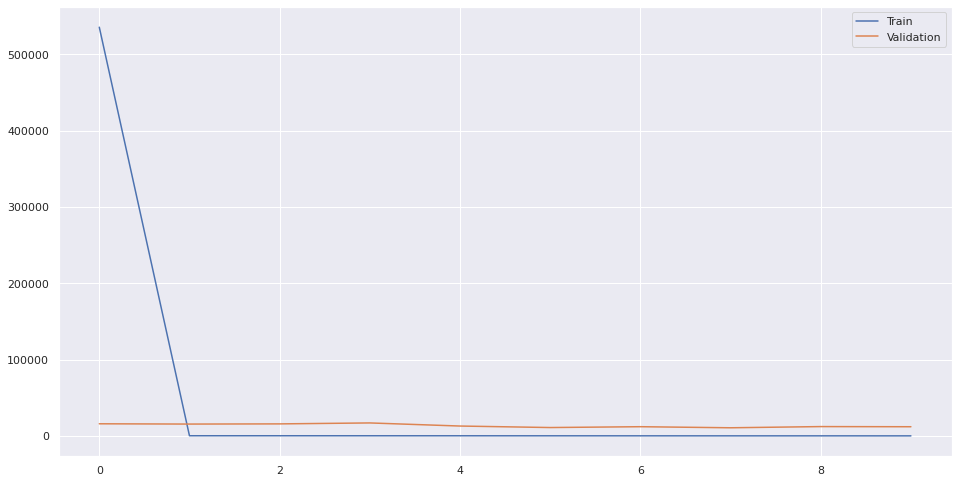

In [108]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
#plt.ylim(0,10000)

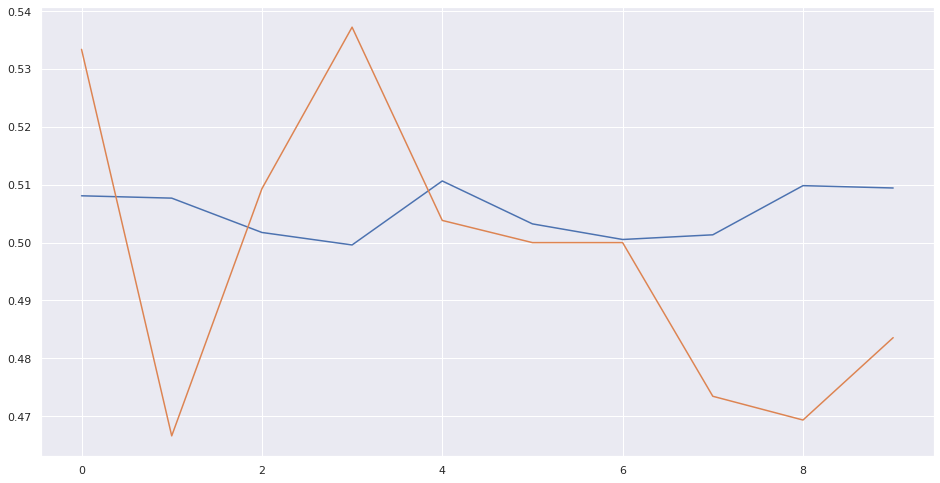

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [110]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_3 = model.predict(x_input, verbose=0)
print(yhat_3)

(2867, 3)
[[ 7291.9863  7277.599 ]
 [ 7309.714   7296.9663]
 [ 7359.749   7335.906 ]
 ...
 [16452.207  16475.758 ]
 [16189.3125 16197.741 ]
 [16515.861  16537.223 ]]


In [111]:
test_mean_3 = np.mean(yhat_3,axis=1)

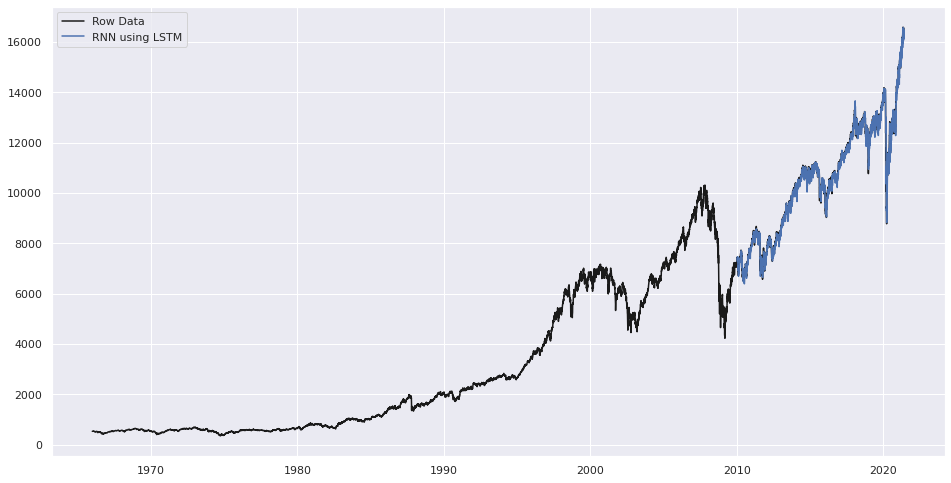

In [112]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test.Date[4:],test_mean_3,label='RNN using LSTM')
plt.legend();

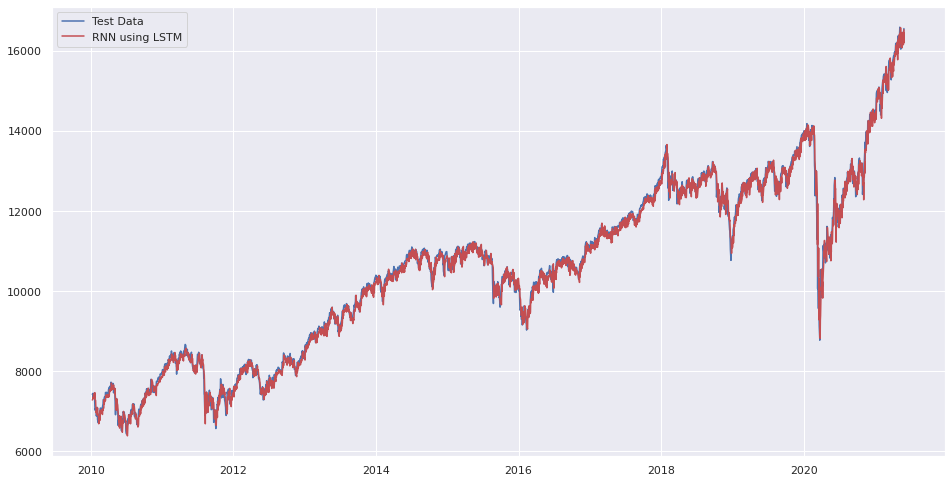

In [113]:
plt.plot(data_test.Date[4:],data_test.Close[4:],'-b',label='Test Data')
plt.plot(data_test.Date[4:],test_mean_3,'r',label='RNN using LSTM')
plt.legend();

In [114]:
r2_score(data_test.Close[4:], test_mean_3)

0.9928734526640421

In [115]:
mean_squared_error(data_test.Close[4:],test_mean_3)

34687.59583625482

In [116]:
data_train_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date < "2015-01-01"]
data_test_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date >= "2015-01-01"]

In [117]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(data_train_N100.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(3830, 3, 1)


In [118]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3, 200)            161600    
                                                                 
 lstm_13 (LSTM)              (None, 3, 200)            320800    
                                                                 
 lstm_14 (LSTM)              (None, 200)               320800    
                                                                 
 dense_4 (Dense)             (None, 2)                 402       
                                                                 
Total params: 803,602
Trainable params: 803,602
Non-trainable params: 0
_________________________________________________________________


In [119]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
81/81 - 7s - loss: 448159.0625 - accuracy: 0.5156 - val_loss: 4850.4443 - val_accuracy: 0.5261 - 7s/epoch - 87ms/step
Epoch 2/10
81/81 - 3s - loss: 1259.1716 - accuracy: 0.5207 - val_loss: 178.2234 - val_accuracy: 0.5261 - 3s/epoch - 36ms/step
Epoch 3/10
81/81 - 3s - loss: 275.6081 - accuracy: 0.5265 - val_loss: 176.1999 - val_accuracy: 0.5261 - 3s/epoch - 35ms/step
Epoch 4/10
81/81 - 3s - loss: 267.9739 - accuracy: 0.5074 - val_loss: 169.4415 - val_accuracy: 0.5364 - 3s/epoch - 35ms/step
Epoch 5/10
81/81 - 3s - loss: 263.2753 - accuracy: 0.5175 - val_loss: 171.0794 - val_accuracy: 0.5261 - 3s/epoch - 35ms/step
Epoch 6/10
81/81 - 3s - loss: 225.9283 - accuracy: 0.4906 - val_loss: 114.9439 - val_accuracy: 0.5032 - 3s/epoch - 35ms/step
Epoch 7/10
81/81 - 3s - loss: 178.6322 - accuracy: 0.4969 - val_loss: 101.9160 - val_accuracy: 0.5024 - 3s/epoch - 35ms/step
Epoch 8/10
81/81 - 3s - loss: 170.3728 - accuracy: 0.5090 - val_loss: 111.3370 - val_accuracy: 0.4929 - 3s/epoch - 35ms/

(0.0, 1000.0)

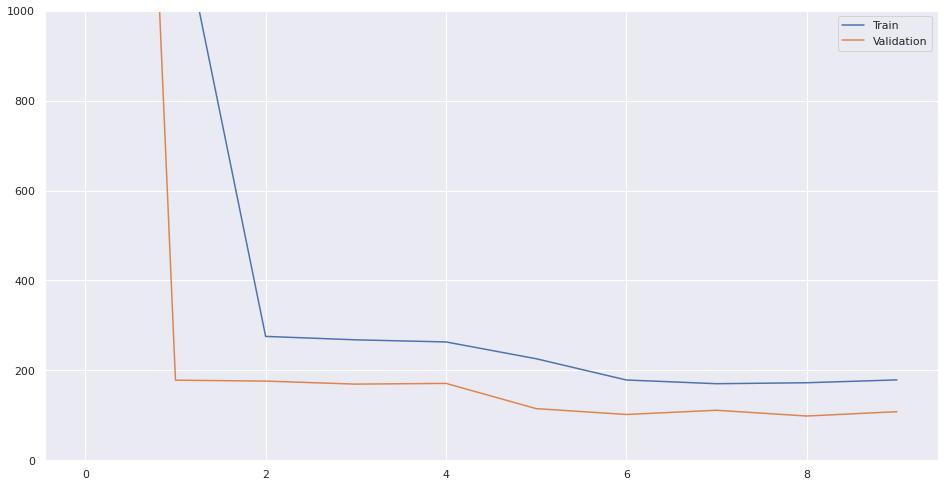

In [120]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.ylim(0,1000)

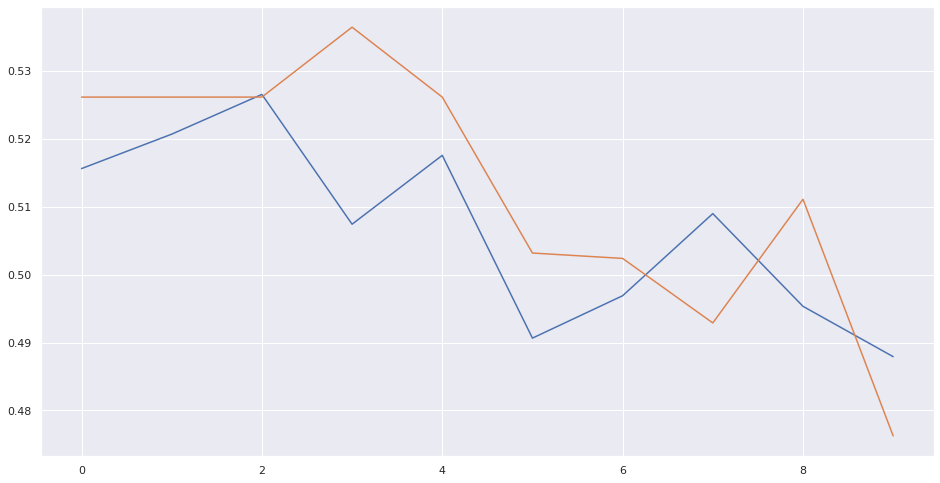

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [122]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(data_test_N100.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_N100 = model.predict(x_input, verbose=0)
print(yhat_N100)

(1636, 3)
[[ 816.38666  814.21796]
 [ 815.7265   814.45685]
 [ 829.9001   827.93884]
 ...
 [1260.063   1253.521  ]
 [1266.5916  1260.1621 ]
 [1256.0708  1249.535  ]]


In [123]:
test_mean_N100 = np.mean(yhat_N100,axis=1)
test_mean_N100

array([ 815.3023 ,  815.0917 ,  828.91943, ..., 1256.792  , 1263.3768 ,
       1252.803  ], dtype=float32)

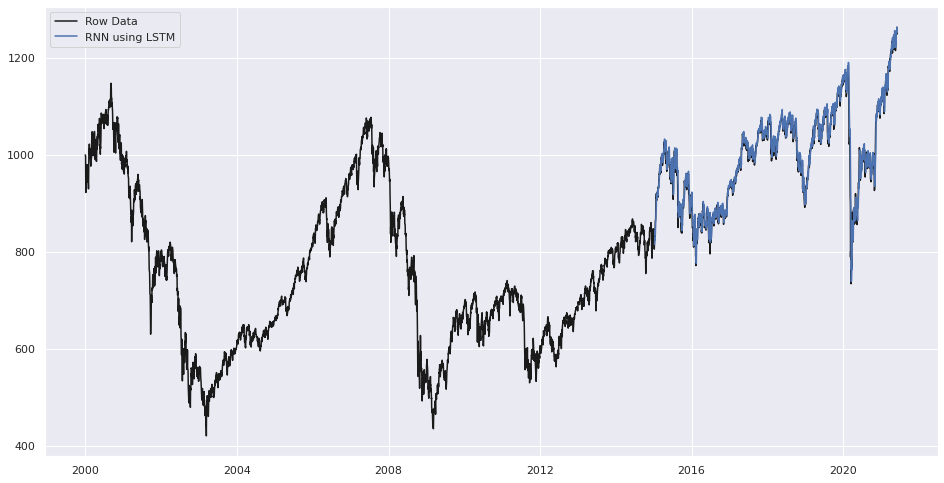

In [124]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test_N100.Date[4:],test_mean_N100,label='RNN using LSTM')
plt.legend()

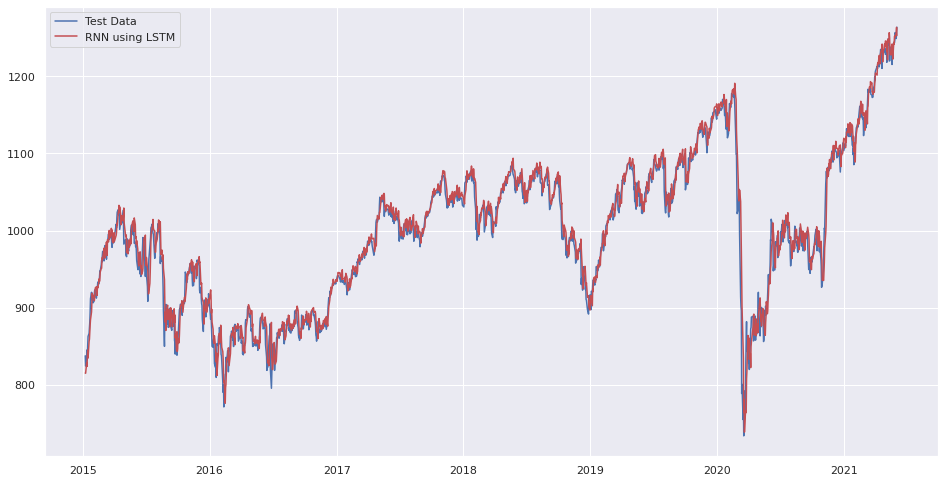

In [125]:
plt.plot(data_test_N100.Date[4:],data_test_N100.Close[4:],'-b',label='Test Data')
plt.plot(data_test_N100.Date[4:],test_mean_N100,'r',label='RNN using LSTM')
plt.legend()

In [126]:
r2_score(data_test_N100.Close[4:], test_mean_N100)

0.9674081907466776

In [127]:
mean_squared_error(data_test_N100.Close[4:],test_mean_N100)

296.5171781606359

In [128]:
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split into samples
X, y = split_sequence(data_train_N100.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(3824, 10, 1)


In [129]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10, 200)           161600    
                                                                 
 lstm_16 (LSTM)              (None, 10, 200)           320800    
                                                                 
 lstm_17 (LSTM)              (None, 200)               320800    
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [130]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
81/81 - 12s - loss: 186909.9531 - accuracy: 0.0000e+00 - val_loss: 357.9141 - val_accuracy: 0.0000e+00 - 12s/epoch - 149ms/step
Epoch 2/10
81/81 - 8s - loss: 538.8068 - accuracy: 0.0000e+00 - val_loss: 341.6840 - val_accuracy: 0.0000e+00 - 8s/epoch - 100ms/step
Epoch 3/10
81/81 - 8s - loss: 504.1443 - accuracy: 0.0000e+00 - val_loss: 250.5645 - val_accuracy: 0.0000e+00 - 8s/epoch - 99ms/step
Epoch 4/10
81/81 - 8s - loss: 516.2497 - accuracy: 0.0000e+00 - val_loss: 248.4436 - val_accuracy: 0.0000e+00 - 8s/epoch - 99ms/step
Epoch 5/10
81/81 - 8s - loss: 234.1999 - accuracy: 0.0000e+00 - val_loss: 116.6218 - val_accuracy: 0.0000e+00 - 8s/epoch - 100ms/step
Epoch 6/10
81/81 - 8s - loss: 193.3401 - accuracy: 0.0000e+00 - val_loss: 157.5943 - val_accuracy: 0.0000e+00 - 8s/epoch - 99ms/step
Epoch 7/10
81/81 - 8s - loss: 154.2426 - accuracy: 0.0000e+00 - val_loss: 172.2939 - val_accuracy: 0.0000e+00 - 8s/epoch - 100ms/step
Epoch 8/10
81/81 - 8s - loss: 147.8620 - accuracy: 0.0000e+0

(0.0, 1000.0)

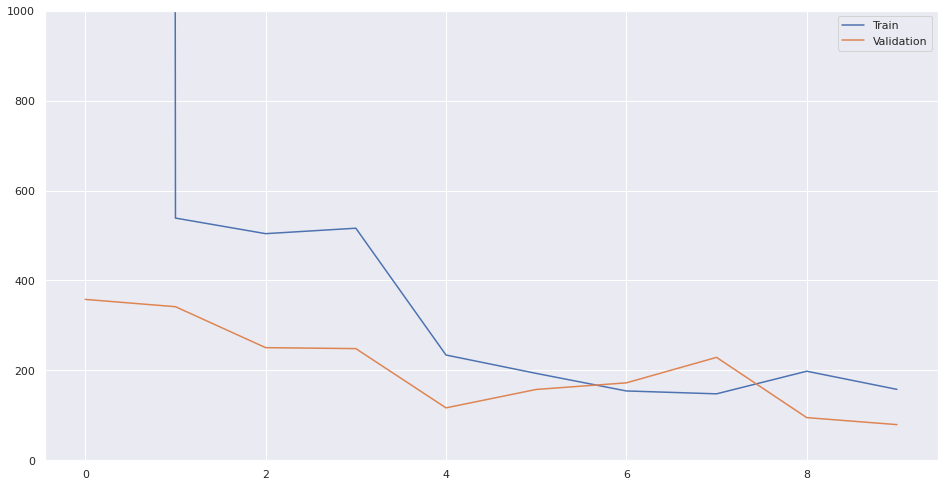

In [131]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.ylim(0,1000)

In [132]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split into samples
X, y = split_sequence(data_test_N100.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_N100_3 = model.predict(x_input, verbose=0)
print(yhat_N100_3)

(1630, 10)
[[ 844.17035]
 [ 848.03845]
 [ 853.555  ]
 ...
 [1255.7164 ]
 [1254.8705 ]
 [1259.3058 ]]


In [133]:
test_mean_N100_3 = np.mean(yhat_N100_3,axis=1)
test_mean_N100_3

array([ 844.17035,  848.03845,  853.555  , ..., 1255.7164 , 1254.8705 ,
       1259.3058 ], dtype=float32)

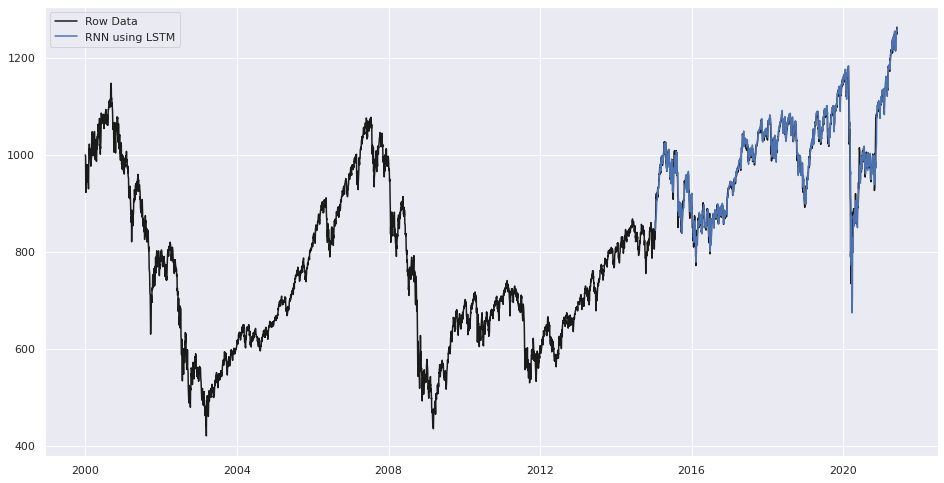

In [134]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test_N100.Date[10:],test_mean_N100_3,label='RNN using LSTM')
plt.legend()

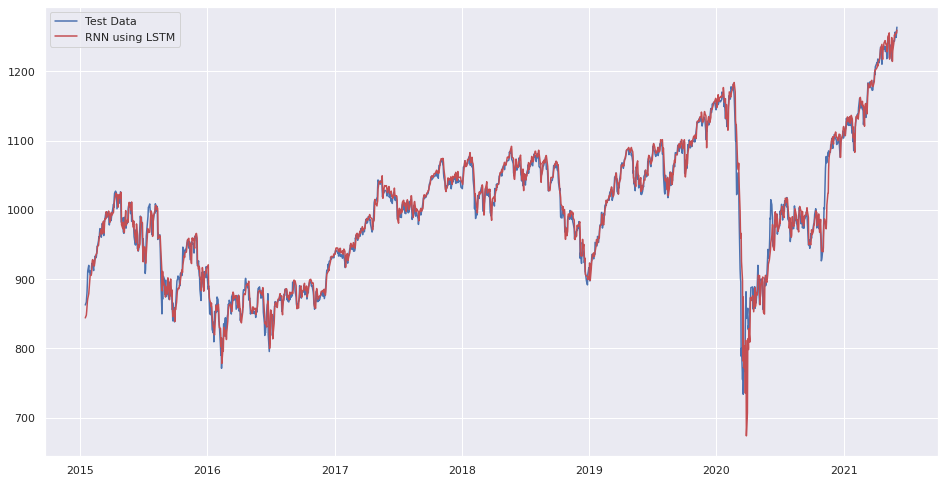

In [135]:
plt.plot(data_test_N100.Date[10:],data_test_N100.Close[10:],'-b',label='Test Data')
plt.plot(data_test_N100.Date[10:],test_mean_N100_3,'r',label='RNN using LSTM')
plt.legend()

In [136]:
r2_score(data_test_N100.Close[10:], test_mean_N100_3)

0.9687975781319386

In [137]:
mean_squared_error(data_test_N100.Close[10:],test_mean_N100_3)

281.9989480372716